### KNN iris 2진 분류(Binary Classification)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 준비

In [16]:
df = pd.read_csv('iris.csv')
df.columns = [i.lower() for i in df.columns]
df.head()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df = df.drop(labels='id',axis=1)
df.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [19]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepallengthcm  150 non-null    float64
 1   sepalwidthcm   150 non-null    float64
 2   petallengthcm  150 non-null    float64
 3   petalwidthcm   150 non-null    float64
 4   species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
# 0 Iris-setosa
# 1 Iris-versicolor
# 2 Iris-virginica
df['species'] = df['species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
df

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [21]:
df.columns

Index(['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm',
       'species'],
      dtype='object')

In [22]:
X=df.iloc[:,:-1] # 앞에가 row 뒤가 columns
y=df.iloc[:,-1]
X.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
# 2번째방법
X=df.drop(['species'],axis=1)
y=df.iloc[:,-1]
X.shape,y.shape

((150, 4), (150,))

### test data 와 validation 분리

In [24]:
# !pip install scikit-learn --user

In [28]:
from sklearn.utils import shuffle
# 80 : 20 으로 나누기
# sklearn.utils.shuffle(X,y)
X,y = shuffle(X,y)

X_train = X.iloc[:120,:]
X_test = X.iloc[120:,:]
y_train = y[:120]
y_test = y[120:]
X_train.shape,X_test.shape

C:\Users\007\AppData\Local\Temp\ipykernel_25516\3778363878.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:120]
C:\Users\007\AppData\Local\Temp\ipykernel_25516\3778363878.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[120:]


((120, 4), (30, 4))

In [30]:
X_test.shape

(30, 4)

### 정규화
- min,max normalization
- standardzation (표준화)


In [31]:
# train data만 normalization을 해줌 test는 절대 하면 안됨..
for col in X_train.columns :
    X_train[col]=(X_train[col]-X_train[col].mean())/(X_train[col].std())
X_train

C:\Users\007\AppData\Local\Temp\ipykernel_25516\3861735492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col]=(X_train[col]-X_train[col].mean())/(X_train[col].std())


,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
43,-1.006683,1.066615,-1.228638,-0.787294
18,-0.192810,1.787030,-1.172429,-1.177151
140,0.969865,0.106061,1.019727,1.551847
124,0.969865,0.586338,1.075936,1.161990
23,-0.890415,0.586338,-1.172429,-0.917247
...,...,...,...,...
22,-1.471753,1.306753,-1.565893,-1.307103
42,-1.704288,0.346200,-1.397265,-1.307103
37,-1.122950,0.106061,-1.284847,-1.437056
131,2.365075,1.787030,1.469400,1.032038


In [32]:
X_train
X_train = X_train.values
y_train = y_train.values
type(X_train),type(y_train)

(numpy.ndarray, numpy.ndarray)

### 테스트 데이터

In [33]:
def get_iris():
    df = pd.read_csv('iris.csv')
    # change the name of columns with lower func
    df.columns = [i.lower() for i in df.columns]
    # drop id
    df.drop(['id'],axis=1)
    # change y from str to int
    df['species'] = df['species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
    # divide X,y
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    # shuffle X,y
    X,y = shuffle(X,y)
    # train dataset and test dataset 8:2
    num = int(150*0.8)
    X_train = X.iloc[:num,:]
    X_test = X.iloc[num:,:]
    y_train = y[num:]
    y_test = y[num:]
    X_train = X_train.values
    y_train = y_train.values
    X_test = X_test.values
    y_test = y_test.values
    return X_train,X_test,y_train,y_test

In [40]:
X_train,X_test,y_train,y_test = get_iris()
X_train
y_test

C:\Users\007\AppData\Local\Temp\ipykernel_25516\4221194153.py:25: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[num:]
C:\Users\007\AppData\Local\Temp\ipykernel_25516\4221194153.py:26: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[num:]


array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1],
      dtype=int64)

In [41]:
iris = pd.read_csv('iris.csv')

In [87]:
def get_iris():
    df = pd.read_csv('iris.csv')
    
    # change the name of columns with lower func
    df.columns = [i.lower() for i in df.columns]
    
    # drop id
    df = df.drop(['id'],axis=1)
    df = df.loc[df['species'] != 'Iris-virginica']
    
    # change y from str to int
    df['species'] = df['species'].map({'Iris-setosa':0,'Iris-versicolor':1})
    
    # divide X,y
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    
    # shuffle X,y
    X,y = shuffle(X,y)
    
    # train dataset and test dataset 8:2
    num = int(100*0.8)
    X_train = X.iloc[:num,:]
    X_test = X.iloc[num:,:]
    y_train = y[:num]
    y_test = y[num:]
    for col in X_train.columns:
        mu = X_train[col].mean()
        std = X_train[col].std()
        X_train[col] = (X_train[col] - mu)/std
        X_test[col] = (X_test[col] - mu)/std
    X_train = X_train.values
    y_train = y_train.values
    X_test = X_test.values
    y_test = y_test.values
    return X_train,X_test,y_train,y_test

In [88]:
X_train,X_test,y_train,y_test = get_iris()

C:\Users\007\AppData\Local\Temp\ipykernel_25516\727210414.py:25: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:num]
C:\Users\007\AppData\Local\Temp\ipykernel_25516\727210414.py:26: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[num:]
C:\Users\007\AppData\Local\Temp\ipykernel_25516\727210414.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [89]:
X_train.shape

(80, 4)

In [84]:
X_train

array([[ 0.04392496, -1.7733988 ,  0.76202661,  0.8796387 ],
       [-1.17833474,  0.27611506, -1.07911151, -1.04116044],
       [-0.1088575 ,  0.73156259, -0.80635031, -1.04116044],
       [-0.56720489,  0.95928635, -1.01092121, -0.86654234],
       [ 1.72453204, -0.17933246,  1.03478782,  1.0542568 ],
       [-1.17833474,  0.27611506, -0.87454061, -1.04116044],
       [ 0.50227234, -0.86250375,  0.69383631,  0.70502059],
       [-0.56720489,  0.50383883, -0.80635031, -0.51730613],
       [-0.41442243,  2.32562893, -0.94273091, -1.21577855],
       [ 0.96061973, -0.17933246,  1.17116842,  1.0542568 ],
       [-0.1088575 ,  1.41473388, -0.94273091, -1.04116044],
       [ 1.26618465,  0.50383883,  1.23935872,  1.40349301],
       [ 2.18287943,  0.0483913 ,  1.37573932,  1.22887491],
       [ 0.80783727, -0.40705623,  1.10297812,  1.22887491],
       [-0.71998735,  0.73156259, -0.94273091, -1.04116044],
       [-0.71998735,  0.27611506, -1.14730181, -1.04116044],
       [-1.02555228, -0.

In [67]:
# def get_iris(mode=None):
#     iris = pd.read_csv('iris.csv')
#     df = iris.drop(['Id'], axis=1).copy()
#     df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
   
#     if(mode == 'bin'):
#         df = df.loc[df['species'] != 'Iris-virginica']
       
#     df['species']= df['species'].map({
#         'Iris-setosa':0,
#         'Iris-versicolor':1,
#         'Iris-virginica':2
#     })
#     X = df.drop(['species'], axis=1)
#     y= df['species']

#     X, y = shuffle(X, y)
#     num = int(len(y)*0.8)
   
#     X_train = X.iloc[:num,:]    
#     X_test = X.iloc[num:,:]      
#     y_train = y.iloc[:num]        
#     y_test  = y.iloc[num:]      
   
#     for col in X_train.columns:
#         mu = X_train[col].mean()
#         std = X_train[col].std()
#         X_train[col] = (X_train[col] - mu)/std
#         X_test[col] = (X_test[col] - mu)/std
    
#     return X_train, X_test, y_train, y_test

In [91]:
X_train,X_test,y_train,y_test = get_iris()
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
X_train

(80, 4) (20, 4)
(80,) (20,)


C:\Users\007\AppData\Local\Temp\ipykernel_25516\727210414.py:25: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:num]
C:\Users\007\AppData\Local\Temp\ipykernel_25516\727210414.py:26: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[num:]
C:\Users\007\AppData\Local\Temp\ipykernel_25516\727210414.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

array([[ 0.88661468, -0.43164888,  1.24892823,  1.08809468],
       [-0.62251669,  1.51077108, -0.67779301, -0.68476834],
       [ 0.73570154,  0.64747332,  1.11130528,  1.44266728],
       [-0.92434296,  0.        , -0.9530389 , -1.21662725],
       [ 0.88661468, -0.64747332,  0.76724792,  0.91080838],
       [ 0.28296213, -1.0791222 ,  0.42319056,  0.37894947],
       [-0.62251669,  0.86329776, -1.02185037, -1.03934094],
       [ 1.49026722, -0.64747332,  1.18011675,  1.26538098],
       [ 1.33935409,  0.21582444,  1.11130528,  1.26538098],
       [-0.77342982,  0.64747332, -0.9530389 , -1.03934094],
       [ 0.43387527,  1.94241996, -1.15947331, -1.03934094],
       [-1.37708237,  1.0791222 , -1.29709626, -1.03934094],
       [-1.67890864, -0.21582444, -1.09066184, -1.03934094],
       [ 0.13204899, -0.21582444,  0.83605939,  0.91080838],
       [-1.22616923,  0.21582444, -0.88422742, -1.03934094],
       [-1.37708237,  0.64747332, -1.02185037, -0.86205464],
       [-0.92434296, -1.

### 학습

In [92]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [93]:
# 테스트
clf.score(X_test,y_test)

1.0

In [94]:
# 예측
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0],
      dtype=int64)

In [95]:
# y_pred, y_test 정확도 계산
(y_pred == y_test).sum()/len(y_test) # 정확도

1.0

In [96]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

def print_score(y_true, y_pred):
    # 정확도
    acc = accuracy_score(y_true, y_pred)
    # 정밀도
    pre = precision_score(y_true, y_pred)
    # 재현율
    rec = recall_score(y_true, y_pred)

    print('accuracy:', acc)
    print('precision:', pre)
    print('recall:', pre)

In [97]:
print_score(y_test,y_pred)

accuracy: 1.0
precision: 1.0
recall: 1.0


In [99]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
cfm

array([[10,  0],
       [ 0, 10]], dtype=int64)

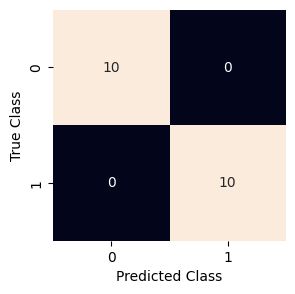

In [100]:
plt.figure(figsize=(3, 3))
sns.heatmap(cfm, annot=True, cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show() 